# Decision Tree
**Practice Set 1**

A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal node tests on attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction. The decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.

In [46]:
import numpy as np
import pandas as pd


In [47]:
data = pd.read_csv('/content/salaries.csv')
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [48]:
X = data.drop('salary_more_then_100k', axis = 'columns')

In [49]:
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [50]:
y = data['salary_more_then_100k']

In [51]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [52]:
# convert label into numbers


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le_company = LabelEncoder()
le_jobs = LabelEncoder()
le_degree = LabelEncoder()


In [55]:
X['company_n'] = le_company.fit_transform(X['company'])
X['jobs_n'] = le_jobs.fit_transform(X['company'])
X['degree_n'] = le_degree.fit_transform(X['company'])


In [56]:
input = X.drop(['company','job','degree'],axis = 'columns')

In [57]:
input

,company_n,jobs_n,degree_n
0,2,2,2
1,2,2,2
2,2,2,2
3,2,2,2
4,2,2,2
5,2,2,2
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [58]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [59]:
model.fit(input, y)

DecisionTreeClassifier()

In [60]:
model.score(input, y)

0.75

In [61]:
model.predict([[2,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Iris Dataset

In [62]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


In [64]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [68]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [69]:
X.shape

(150, 2)

In [70]:
np.unique(y)

array([0, 1, 2])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
np.bincount(y),np.bincount(y_train),np.bincount(y_test)

(array([50, 50, 50]), array([41, 43, 36]), array([ 9,  7, 14]))

In [76]:

from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

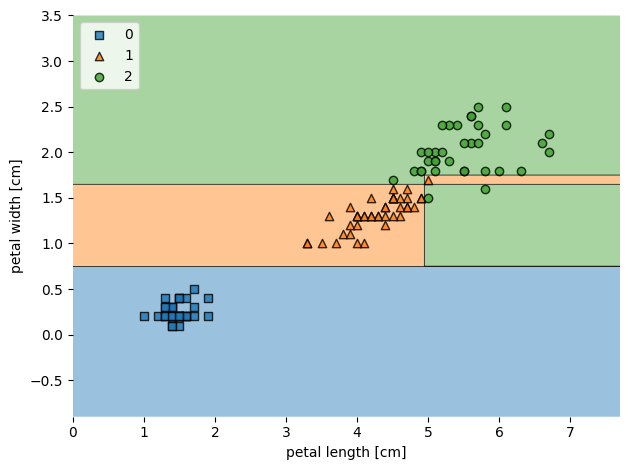

In [77]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=8,
                              random_state=1)
tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [78]:
tree.score(X_train, y_train)

1.0

In [79]:
tree.score(X_test, y_test)

0.9333333333333333

In [80]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [81]:
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [83]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal width <= 0.75\nentropy = 1.581\nsamples = 120\nvalue = [41, 43, 36]\nclass = Versicolor", fillcolor="#fafefc"] ;
1 [label="entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width <= 1.75\nentropy = 0.994\nsamples = 79\nvalue = [0, 43, 36]\nclass = Versicolor", fillcolor="#dffbea"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length <= 4.95\nentropy = 0.348\nsamples = 46\nvalue = [0, 43, 3]\nclass = Versicolor", fillcolor="#47e78a"] ;
2 -> 3 ;
4 [label="petal width <= 1.65\nentropy = 0.159\nsamples = 43\nvalue = [0, 42, 1]\nclass = Versicolor", fillcolor="#3ee684"] ;
3 -> 4 ;
5 [label="entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]\nclass = Versicolor", fillcolor="#39e581"] ;
4 -> 5 ;
6 [label="

In [84]:
from IPython.display import Image

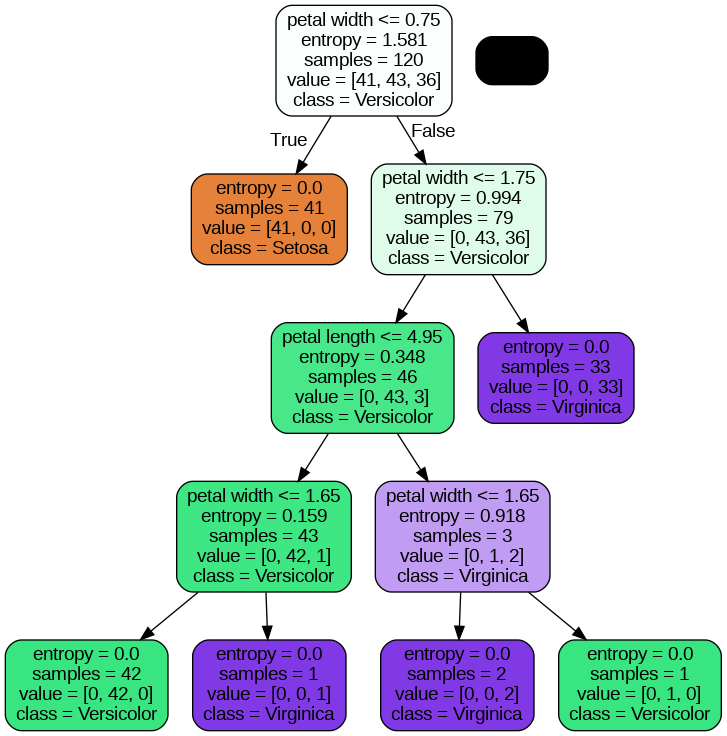

In [85]:
Image('tree.png')

In [87]:
tree.predict([[4.5, 2.3]])

array([2])